## Трёхмерные объекты

![Стэнфордский кролик](https://imgur.com/EeJAlwW.png)

Сложные поверхности в программах трёхмерной графики представляются прилегающими непересекающимися «полигонами» — чаще всего треугольниками или четырёхугольниками, как в примере выше. В этой задаче вам нужно написать некоторые вспомогательные функции, повсеместно использующиеся в таких программах. Визуализация таких объектов на экране будет разобрана в следующей задаче.

Вам предстоит работать с векторами в трёхмерном пространстве. В данной задаче считается, что каждый такой вектор с координатами `x`, `y`, `z` задаётся как `v = np.array([x,y,z])`. Предполагается, что это координаты в некотором фиксированном правом ортонормированном базисе. Каждая точка отождествляется с соответствующим радиус-вектором. Над векторами можно выполнять следующие операции: вычислять длину `np.linalg.norm(v)`, умножать вектор на число `c*v` (здесь `c` — это число),  складывать векторы `v+u` (здесь `u` — это другой вектор), вычитать `v-u`, вычислять скалярное произведение `np.dot(u, v)` и вычислять векторное произведение `np.cross(u, v)`; для проверки равенства `u` и `v` вместо записи `u==v` используйте `np.linalg.norm(u - v) < 1e-9`. **В учебных целях в данной задаче вам запрещено напрямую обращаться к координатам `v[0], v[1], v[2]` и к функции `np.linalg.solve` везде, кроме как в третьей подзадаче**; при этом гарантируется, что для решения достаточно применять только вышеперечисленные операции над векторами и элементарные средства языка python. Для проверки равенства чисел `x` и `y` вместо записи `x==y` используйте `abs(x-y)<1e-9`; в частности, `abs(x)<1e-9` вместо `x==0`. Для решения систем линейных уравнений рекомендуем использовать `np.linalg.solve` ([см. примеры использования](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)) или что-то аналогичное, а не писать решение самостоятельно.

**1. Дублирование геометрии 1.** В 3D сценах часто есть много повторяющихся сложных деталей. Хранить каждую такую деталь отдельно в памяти слишком расточительно, поэтому обычно хранят один невидимый эталонный экземпляр (см. изображение справа), а остальные «копируют».

![Дублирование геометрии](https://imgur.com/j27Nytk.jpg)

Эталонный экземпляр помещают в невидимый куб; в данной задаче это единичный куб с вершинами с координатами $\tiny\left(\begin{array}{c}0\\0\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}1\\0\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}0\\1\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}0\\0\\1\end{array}\right)$, ... (зелёный на изображении). Копии этого куба располагают в разных местах, поворачивают, сжимают, растягивают и деформируют. По техническим причинам применяют только такие деформации, которые трансформируют куб в параллелепипед, переводя соответствующие вершины куба в вершины параллелепипеда и рёбра — в рёбра. Для задания «копии» выбирают четыре точки `w,x,y,z`, не лежащие в одной плоскости; «копирование» переводит вершины куба с координатами $\tiny\left(\begin{array}{c}0\\0\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}1\\0\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}0\\1\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}0\\0\\1\end{array}\right)$ в `w,x,y,z`, соответственно, а остальные вершины — в соответствующие вершины параллелепипеда, построенного на `w,x,y,z` (см. изображение). Эта трансформация также деформирует всё содержимое куба, но оставляя прямые линии прямыми, а параллельные — параллельными. Допишите функцию, которая по точке `p` возвращает соответствующую ей в описанной трансформации точку в параллелепипеде, построенном на `w,x,y,z`, если `p` лежит внутри единичного куба или на его гранях/рёбрах; и возвращает `p` (т.е. без изменений), если `p` лежит вне кубе. В решении можно использовать `e1`, `e2`, `e3`, задающие векторы с координатами $\tiny\left(\begin{array}{c}1\\0\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}0\\1\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}0\\0\\1\end{array}\right)$.


In [9]:
def original_to_copy(p, w, x, y, z):
    '''Транслировать точку p из эталона в копию'''
    e1 = np.array([1.,0.,0.])  # в учебных целях в этой подзадаче запрещено создавать другие...
    e2 = np.array([0.,1.,0.])  # ...векторы с явно заданными координатами, помимо e1,e2,e3
    e3 = np.array([0.,0.,1.])
    
    projection_p_on_e1 = np.dot(p, e1)
    projection_p_on_e2 = np.dot(p, e2)
    projection_p_on_e3 = np.dot(p, e3)
    
    decomposion_p_wx = projection_p_on_e1 * (x - w) 
    decomposion_p_wy = projection_p_on_e2 * (y - w)
    decomposion_p_wz = projection_p_on_e3 * (z - w)
    
    if (0 <= projection_p_on_e1 <= 1) and (0 <= projection_p_on_e2 <= 1) and (0 <= projection_p_on_e3 <= 1):
        return decomposion_p_wx + decomposion_p_wy + decomposion_p_wz + w
    
    return p

**2. Параллелепипед.** Допишите функцию `inside_parallelepiped(p,w,x,y,z)`, которая возвращает `True`, если точка `p` лежит внутри параллелепипеда, построенного на `w,x,y,z` как в подзадаче 1, или на его грани/ребре, и `False` в противном случае. В учебных целях это нужно сделать, не обращаясь явно к координатам точек (напоминаем, что все точки задаются своими радиус-векторами).

In [10]:
def inside_parallelepiped(p, w, x, y, z):
    '''True, если p внутри параллелепипеда на w,x,y,z, и False иначе'''
    pw = w - p
    px = x - p
    py = y - p
    pz = z - p
    pi = ((z - w) + (x - w) + w) - p
    pl = ((z - w) + (y - w) + w) - p       #i - точка грани xwz, l - точка грани ywz, k - точка грани xwy, j - точка грани izl 
    pk = ((x - w) + (y - w) + w) - p
    pj = ((x - w) + (y - w) + (z - w) + w) - p
    
    V = abs(np.dot(x - w, np.cross(y - w, z - w)))
    V_wzix = calculate_volume(pw, pz, pi, px)
    V_ylzw = calculate_volume(py, pl, pz, pw)
    V_wxky = calculate_volume(pw, px, pk, py)
    V_xijk = calculate_volume(px, pi, pj, pk)
    V_kjly = calculate_volume(pk, pj, pl, py)
    V_zijl = calculate_volume(pz, pi, pj, pl)
    
    if abs(V - (V_wzix + V_ylzw + V_wxky + V_xijk + V_kjly + V_zijl)) < 1e-9:
        return True
    else:
        return False

def calculate_volume(a, b, c, d):
    return (abs(np.dot(a, np.cross(b, c))) + abs(np.dot(a, np.cross(c, d)))) / 6

**3. Дублирование геометрии 2.** Для того, чтобы понимать, в каком отношении произвольная точка `p` находится к данной копии эталона (лежит ли на поверхности? внутри? и т.п.), нужна функция `copy_to_original`, которая выполняет «обратное» копирование, т.е. определяет координаты той точки, из которой была получена `p`. А именно, если `inside_parallelepiped(p,w,x,y,z)` равно `True`, то `copy_to_original(p,w,x,y,z)` должна возвращать точку `q`, такую что `original_to_copy(q,w,x,y,z)` равно `p`, а в противном случае нужно вернуть `None`. В частности, `copy_to_original(p,w,x,y,z)` отображает `p=w` (а также `p=x`, `p=y`, `p=z`) в $\tiny\left(\begin{array}{c}0\\0\\0\end{array}\right)$ (соответственно, в $\tiny\left(\begin{array}{c}1\\0\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}0\\1\\0\end{array}\right)$, $\tiny\left(\begin{array}{c}0\\0\\1\end{array}\right)$). При написании `copy_to_original` разрешено обращаться к координатам векторов.

In [11]:
def copy_to_original(p, w, x, y, z):
    '''Транслировать точку p из копии в эталон'''
    wx = (x - w)
    wy = (y - w)
    wz = (z - w)
    wp = (p - w)
    
    matrix = np.array([wx, wy, wz]).T
    p_in_new_basis = np.linalg.solve(matrix, wp)
    
    if inside_parallelepiped(p, w, x, y, z):
        return p_in_new_basis
    else:
        return None

**4. Объём тела.**
Вам дан список четырёхугольников `polygons`. Каждый четырёхугольник описывается своими вершинами `a,b,c,d` (заданными радиус-векторами) в порядке обхода по периметру; гарантируется, что `a,b,c,d` лежат в одной плоскости (см. изображение). Четырёхугольники могут касаться друг друга только по рёбрам и все вместе образуют поверхность без «дырок». Эта поверхность ограничивает тело. Вам дана точка `w`, такая что любой отрезок, проведённый из `w` в вершину произвольного четырёхугольника из `polygons`, целиком содержится внутри тела:

![Голова](https://imgur.com/XOv0rEF.png)

Допишите функцию подсчёта объёма тела. Внимание: некоторые четырёхугольники могут быть невыпуклыми.

In [12]:
def volume_with_help(polygons, w):
    '''Объём тела, ограниченного сеткой из четырёхугольников'''
    vol = 0
    for a, b, c, d in polygons:  # перебрать все четырёхугольники a,b,c,d
        volume_abd_cbd = abs(np.dot(a - w, np.cross(b - w, d - w))) + abs(np.dot(c - w, np.cross(b - w, d - w)))
        volume_bac_dac = abs(np.dot(d - w, np.cross(a - w, c - w))) + abs(np.dot(b - w, np.cross(a - w, c - w)))
        vol += min(volume_abd_cbd, volume_bac_dac)
    return vol / 6

**5. Многоугольные грани.**
Полигональная сетка не обязательно задаётся четырёхугольниками. В этой подзадаче вам дан выпуклый многогранник, каждая грань которого является выпуклым многоугольником (напомним, что тело называется выпуклым, если любой отрезок, концы которого принадлежат этому телу, также целиком лежит в нём). Все грани даны в списке `faces`. Грань `f = faces[i]`, где `0<=i<len(faces)`, задана списком точек: `f[0], f[1], ..., f[len(f)-1]`; все эти точки гарантированно лежат в одной плоскости, являются вершинами выпуклого многоугольника и заданы в порядке обхода по/против часовой стрелки. Допишите функцию, которая вычисляет объём таким образом заданного тела.

In [13]:
def polyhedron_volume(faces):
    '''Объём выпуклого тела, ограниченного сеткой из многоугольников'''
    vol = 0
    start_point = faces[0][0]
    for f in faces:  # перебрать все грани
        for i in range(len(f) - 2):
            volume = abs(np.dot(f[0] - start_point, np.cross(f[i + 1] - f[0], f[i + 2] - f[0])))
            vol += volume
    return vol / 6

## Тестирование

Осталось проверить, проходят ли ваши решения первоначальное тестирование. Выполните весь код (Cell -> Run All или Runtime -> Run All или другим способом, работающим в вашей среде) и посмотрите вердикт внизу страницы. В тестирующем коде разбираться не нужно!

В качестве дополнительного материала тесты генерируют трёхмерную сцену, используя вашу функцию `copy_to_original`. Сцена — это параллелепипед, в котором мы наблюдаем лабиринт, представляющий собой  по сути набор отрезков. Параллелепипед с отрезками отражается функцией `copy_to_original` в 1×1×1 куб. Каждый отображённый отрезок в 1×1×1 кубе задаётся своими концами-точками  `p1` и `p2`.  Вся сцена проецируется на экран — плоскость xOy.  Наблюдатель находится в точке $\small\left(\begin{array}{c}1/2\\1/2\\0\end{array}\right)$ и видит точку $A$ с координатами $\small\left(\begin{array}{c}x\\y\\z\end{array}\right)$ только тогда, когда $z>0$, и в этом случае точка $A$ проецируется на экран в точку $A'$ с координатами $\small\left(\begin{array}{c}(x - 1/2)  / z\\(y - 1/2) / z\end{array}\right)$. Таким образом, чем больше координата $z$ у точки $A$ (т.е. чем дальше точка от наблюдателя), тем ближе её проекция $A'$ к центру экрана. Следовательно, чем «дальше» был отрезок в лабиринте, тем меньших размеров он будет на экране. 

![Отображение](https://imgur.com/7tSXXt2.png)

Ниже приведена функция, которая отображает отрезки списка `lines` из параллелепипеда, заданного точками `w`,`x`,`y`,`z`, в 1×1×1 куб и проецирует их на экран. Каждый отрезок `line` задан двумя концами-точками `line[0]` и `line[1]`. Функция также вычисляет расстояние отрезков до экрана — чем ближе, тем более толстой линией будет нарисован отрезок. 

In [14]:
def visible_2d_lines(lines, w, x, y, z):
    lines2d = []
    for line in lines:   # концы отрезка line - это точки line[0] и line[1]
        p1 = copy_to_original(line[0], w, x, y, z)
        p2 = copy_to_original(line[1], w, x, y, z)
        if p1 is not None and p2 is not None:
            [x1, y1, z1] = p1 - np.array([1/2, 1/2, 0])
            [x2, y2, z2] = p2 - np.array([1/2, 1/2, 0])
            if z1 > 1e-5 and z2 > 1e-5:   # проецируем отрезок line на экран, если line видимый
                lines2d.append({ 'p1': (x1/z1, y1/z1), 'p2': (x2/z2, y2/z2), 'dist': (z1+z2)/2 })
    return lines2d

Код генерации лабиринта и анимации приведён в конце тестов. Разбираться в нём не нужно!

In [15]:
import numpy as np, itertools

def test_all():
    coords = [ np.array([0.5, 0.4, 0.25]), np.array([0., .9, 0.9]), np.array([1.,1.,1.]), 
               np.array([0., 0., 0.]), np.array([0.5, -0.1, 0.1]), np.array([-0.01, 0, 0]),
               np.array([1., 1.1, 0]), np.array([0.5, 1.01, 0.2]) ]
    w, x, y, z = np.array([-2.,3.,5.]), np.array([-1.,4.3,8.]), np.array([2.,3.,-1.]), np.array([-2.,0.,1.])
    changed = [ True, True, True, True, False, False, False, False ]
    
    succ = True
    for p, chg in zip(coords, changed): # deliberately obscured to avoid tips
        q = (1 - sum(p)) * w + sum([a*b for a,b in zip([p[0],p[1],p[2]], [x,y,z])])
        ans = original_to_copy(p, w, x, y, z)
        res = q if chg else p
        if abs(np.linalg.norm(ans - res)) >= 1e-9:
            print('Первое задание не прошло тест:')
            print('Результат', ans, 'должен быть', res, 'на параметрах p,w,x,y,z =',p,w,x,y,z)
            succ = False
            break
    if succ:
        print('Первое задание прошло все тесты')

    succ = True
    for c, res in zip(coords, changed): # deliberately obscured to avoid tips
        p = (1 - sum(c)) * w + sum([a*b for a,b in zip(c, [x,y,z])])
        ans = inside_parallelepiped(p, w, x, y, z)
        if ans != res:
            print('Второе задание не прошло тест:')
            print('Результат', ans, c, 'должен быть', res, 'на параметрах p,w,x,y,z =',p,w,x,y,z)
            succ = False
            break
    if succ:
        print('Второе задание прошло все тесты')
    
    succ = True
    for c, chg in zip(coords, changed): # deliberately obscured to avoid tips
        p = (1 - sum(c)) * w + sum([a*b for a,b in zip(c, [x,y,z])])
        ans = copy_to_original(p, w, x, y, z)
        res = c if chg else p
        if (ans is None and chg) or (ans is not None and abs(np.linalg.norm(ans - res)) >= 1e-9):
            print('Третье задание не прошло тест:')
            print('Результат', ans, 'должен быть', res, 'на параметрах p,w,x,y,z =',p,w,x,y,z)
            succ = False
            break
    if succ:
        print('Третье задание прошло все тесты')

    mapping = { 'o':[0.,0,0], 'x':[1.,0,0], 'y':[0.,1,0], 'z':[0.,0,1], 'e':[1.,1,1],
                'a':[0,.5,.5], 'b':[.5,.5,0], 'c':[1.,1,0], 'd':[0.,1,1],
                'm':[0.,-1,0], 'n':[-2.,0,0], 'k':[0.,2,0], 'h':[3.,3,1], 'f':[1.,0,1]}
    def f(fig): return [[np.array(mapping[c]) for c in tri] for tri in fig]
  
    tests = [{'w': [.1,.1,.1], 'r':1/6, 't':f(['oxz', 'ozy', 'oyx', 'xzy'])},
             {'w': [.5,.5,.5], 'r':.5, 't':f(['oxz', 'ozy', 'oyx', 'ezx', 'eyz', 'exy'])},
             {'w': [.4,.8,.2], 'r':4.5/3, 't':f(['xmnk', 'xmh', 'mnh', 'nkh', 'kxh'])},
             {'w': [.0,.0,.0], 'r':1, 't':f(['zdyo', 'zdef', 'zfxo', 'cxoy', 'cxfe', 'cyde'])}]
    
    succ = True
    for i, test in enumerate(tests):
        faces = []
        for f in test['t']:
            if len(f) != 3:
                faces.append(f)
            else:
                [a, b, c] = f
                d = (a + (a + b + c) / 3.) / 2.
                no_conv = [a, (a + b) / 2., d, (a + c) / 2.]
                faces.append(no_conv[i % 4 : 4] + no_conv[:i % 4])
                faces.append([b, (b + a) / 2., d, (b + c) / 2.])
                faces.append([c, (c + a) / 2., d, (c + b) / 2.])
        ans = volume_with_help(faces, np.array(test['w']))
        if abs(ans - test['r']) >= 1e-9:
            print('Четвёртое задание не прошло тест:')
            print('Результат', ans, 'должен быть', test['r'], 
                  'на параметрах w =', test['w'], 'и polygons =', faces)
            succ = False
            break
    if succ:
        print('Четвёртое задание прошло все тесты')

    succ = True
    for test in tests:
        ans = polyhedron_volume(test['t'])
        if abs(ans - test['r']) >= 1e-9:
            print('Пятое задание не прошло тест:')
            print('Результат', ans, 'должен быть', test['r'], 'faces =', test['t'])
            succ = False
            break
    if succ:
        print('Пятое задание прошло все тесты')

Первое задание прошло все тесты
Второе задание прошло все тесты
Третье задание прошло все тесты
Четвёртое задание прошло все тесты
Пятое задание прошло все тесты


<IPython.core.display.Javascript object>


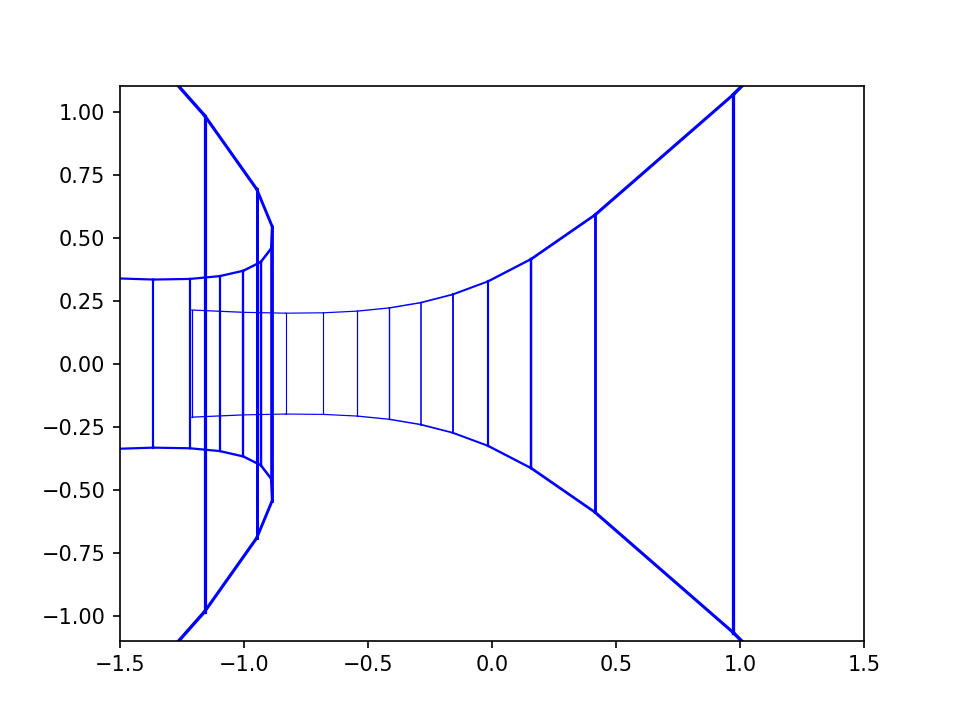

In [16]:
test_all()

%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from matplotlib import animation

lines = [[(3.,0.,-1.), (3.,0.,1.)]]
def add_walls(pts_xy):
    for x, y in pts_xy:
        lines.extend([[lines[-1][0], (x,y,-1.)], [lines[-1][1], ((x,y,1.))], [(x,y,-1.), (x,y,1.)]])
add_walls([ (3 * np.cos(np.pi * k / 20), 3 * np.sin(np.pi * k / 20)) for k in range(1,20)])
add_walls([ (-3., -4 * np.pi / 20 * k) for k in range(1,10) ])
lines.append([(5.,0.,-1.), (5.,0.,1.)])
add_walls([ (5 * np.cos(np.pi * k / 20), 5 * np.sin(np.pi * k / 20)) for k in range(1,20)])
add_walls([ (-5., -4 * np.pi / 20 * k) for k in range(1,10) ])
lines.extend([[lines[-1][0], np.array(lines[-1][0]) + (2,0,0)],[lines[-1][1], np.array(lines[-1][1]) + (2,0,0)]])

cameras = []
for k in range(49):
    d = np.array([np.cos(np.pi * k / 50), np.sin(np.pi * k / 50), 0.0])
    w = -2*d + np.array([0,0,-6])
    cameras.append([w, w + 12*d, w + np.array([0,0,12]), w + 12*np.array([-d[1], d[0], 0.0])])

fig, ax = plt.subplots()
def update(nframe):
    ax.clear()
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.1, 1.1)
    for line in visible_2d_lines(lines, *cameras[nframe % len(cameras)]):
        ax.plot([line['p1'][0],line['p2'][0]], [line['p1'][1],line['p2'][1]], 
                color = 'blue', linewidth = 3 * max(0.05, 0.6 - line['dist']))
anim = animation.FuncAnimation(fig, update, frames=49, interval=40)
try:
    display(HTML(anim.to_html5_video()))
except:
    plt.show()